# Feature Transformation
Why?
- Speed up Linear Regression, Gradient Descent, Global Minima
- Algorithms like KNN, K-Means, Heirarchical Clustering etc. use Euclidian Distance.. if features are not transformed, then unnecessary large distances will be calculated and distort the model
- Every point has vector and direction; vectors shouldnt be huge
- Do we require tranformation for ensemble techniques? NO! Since ensemble techniques like DT, Random Forest etc. create trees based on values.
- Deep Learning Techniques? ANN, CNN, RNN. Here too, transformation/standardisation/scaling is required.

## Techniques:
- Normalisation & Standardisation
- Scaling to Minimum & Maximum Values
- Scaling to Median & Quantiles
- Gaussian Transformation
    > Logarithmic Transformation
    > Reciprocal Transformation
    > Sq. Rt. Transformation
    > Exponential Transformation
    > Box Cox Transformation

## Standardisation
Bring all the variables or features to a similar scale. Centering the variable to Zero using Z-scaling | z = (x-x_mean)/std

In [1]:
# Import Data
gdurltitanic = 'https://drive.google.com/file/d/15tUbXaTIktuLzNjTq6euUHqBpGNuz7u6/view?usp=sharing'
gdtitanic = 'https://drive.google.com/uc?export=download&id='+gdurltitanic.split('/')[-2]

In [2]:
import pandas as pd
df = pd.read_csv(gdtitanic, usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [4]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Standardisation
Using Standardscalar from sklearn library

#### Difference between Fit vs. Fit_Transform
- Fit calculates the parameters mean and std. and saves them
- Transform uses these parameters and applies them to a dataset
- Fit_Transform combines the two steps

### Standard Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

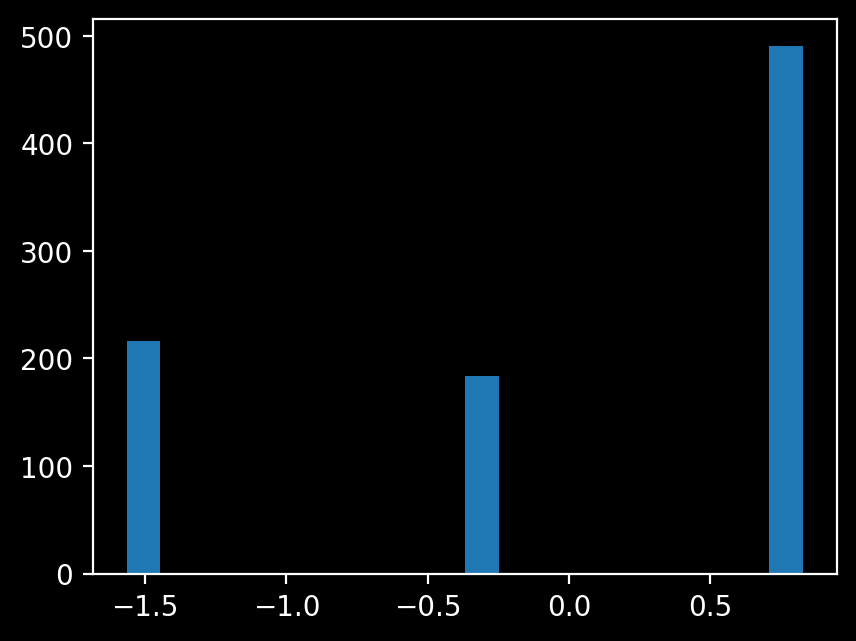

In [9]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

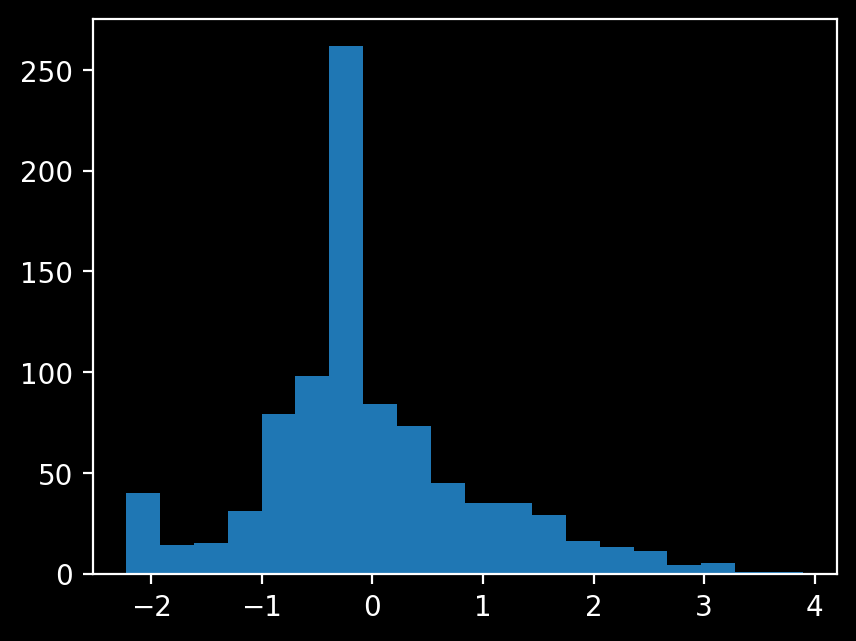

In [10]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

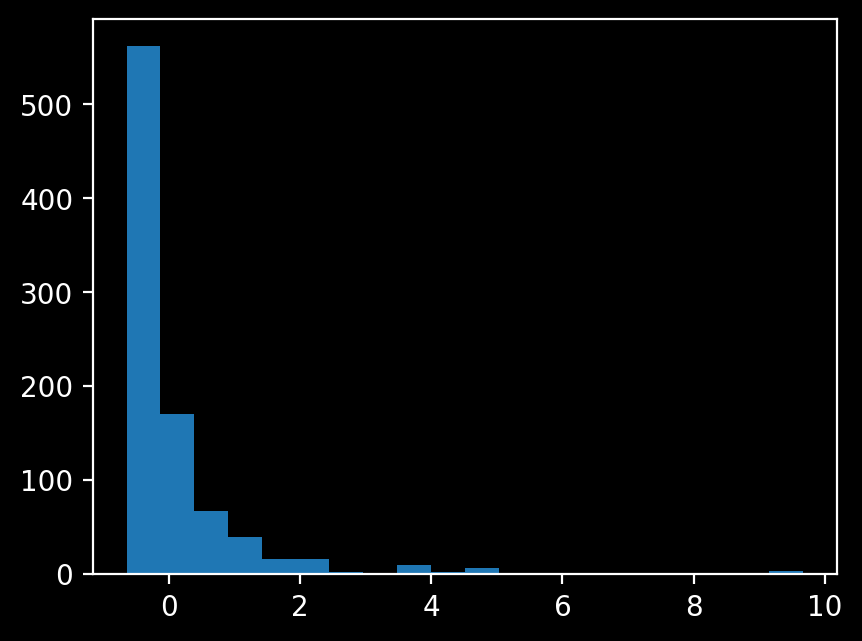

In [11]:
plt.hist(df_scaled[:,3],bins=20)

### Min-Max Scaling
Min Max scales the values between 0 and 1
x_scaled = (x-x.min)/(x.max - x.min)
- Works best with CNN, deep learning
- Sometimes used with ML too, but if there are many outliers, it impacts the algorithm

In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns = df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

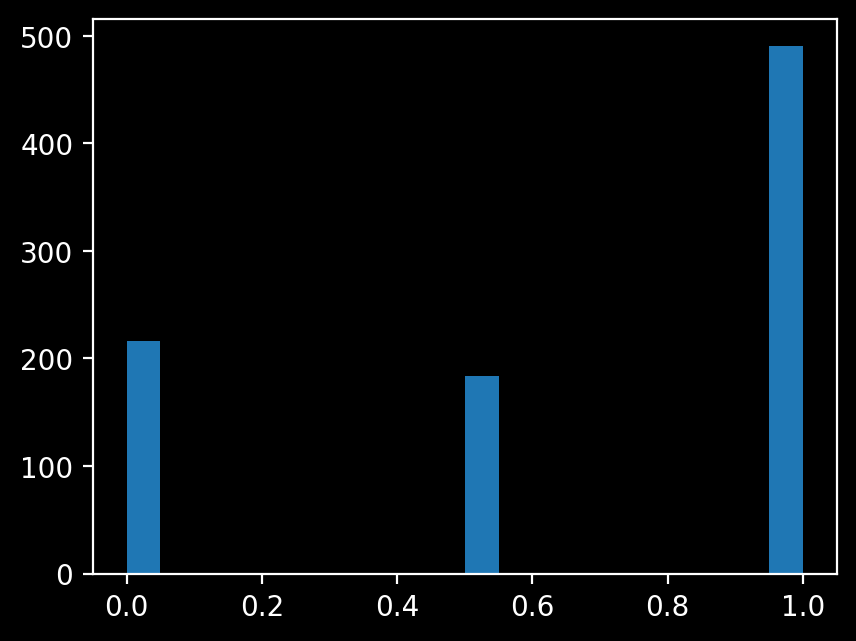

In [14]:
plt.hist(df_minmax['Pclass'],bins=20)

### Robust Scaler
Used to scale the feature to median and quantiles
Inter Quantile Range IQR = 75th Quantile - 25th Quantile
x_scaled = (x-x.median)/IQR

#### When to Use?
Better when there are many outliers

In [16]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

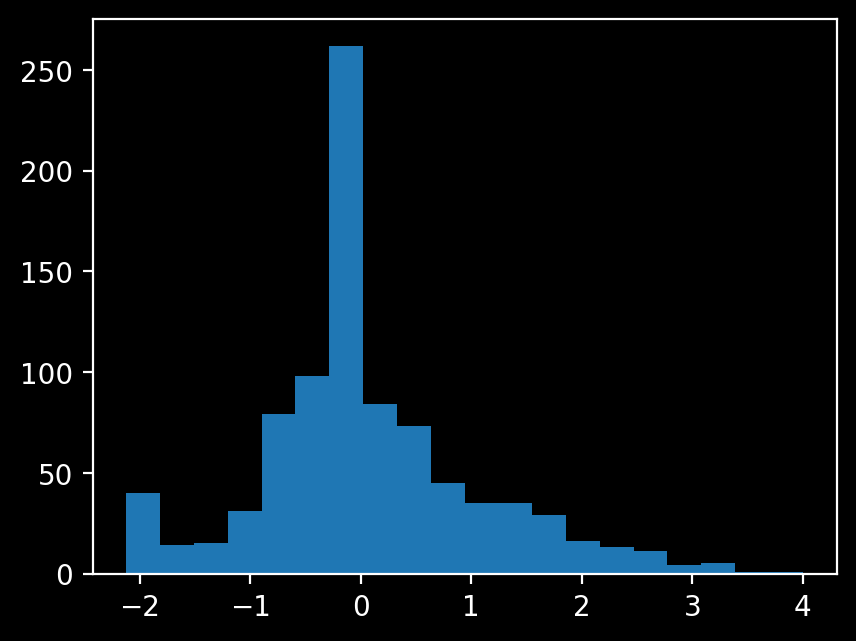

In [17]:
plt.hist(df_robust['Age'],bins=20)

### Gaussian Transformation

Gaussian Transformation
- Logarithmic Transformation
- Reciprocal Transformation
- Sq. Rt. Transformation
- Exponential Transformation
- Box Cox Transformation

#### Logarithmic Transformation